In [1]:
from transformers import AutoImageProcessor, AutoModelForObjectDetection
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches

device = 'cuda' if torch.cuda.is_available() else 'cpu'
# Load the YOLOS model and processor
image_processor = AutoImageProcessor.from_pretrained("hustvl/yolos-small")
model = AutoModelForObjectDetection.from_pretrained("hustvl/yolos-small").to(device)


preprocessor_config.json:   0%|          | 0.00/292 [00:00<?, ?B/s]

c:\Users\minhh\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\minhh\.cache\huggingface\hub\models--hustvl--yolos-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/123M [00:00<?, ?B/s]

Detected person with confidence 0.974 at location [0.22, 33.11, 107.0, 179.35]
Detected person with confidence 0.913 at location [298.4, 0.19, 704.1, 294.66]
Detected cup with confidence 0.986 at location [-0.13, 195.86, 84.49, 257.99]
Detected person with confidence 0.997 at location [526.22, 2.8, 1278.47, 656.05]
Detected person with confidence 0.988 at location [105.87, 1.73, 472.74, 294.68]
Detected dining table with confidence 0.876 at location [-1.93, 190.05, 931.78, 683.05]
Detected cup with confidence 1.0 at location [22.14, 460.97, 169.9, 558.61]
Detected cup with confidence 0.998 at location [194.32, 294.22, 278.43, 366.22]
Detected person with confidence 0.786 at location [200.54, 1.59, 696.52, 298.44]


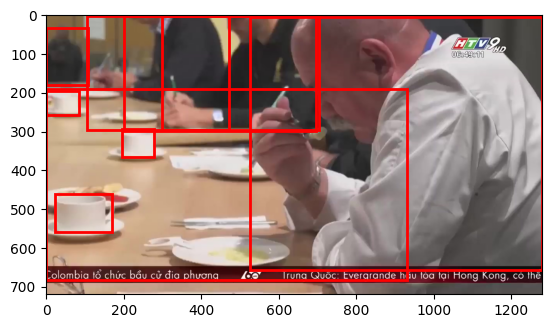

In [10]:
image = Image.open(".\\keyframes\\L01_V001\\200.jpg")

# Prepare the image for the model
inputs = image_processor(images=image, return_tensors="pt").to(device)
outputs = model(**inputs)

# Convert outputs (bounding boxes and class logits) to Pascal VOC format (xmin, ymin, xmax, ymax)
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.7, target_sizes=target_sizes)[0]

# Plotting the image with bounding boxes
fig, ax = plt.subplots(1)
ax.imshow(image)

# Loop through detected results and add bounding boxes
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    xmin, ymin, xmax, ymax = box
    
    # Add a red rectangle (bounding box)
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor="red", facecolor="none")
    ax.add_patch(rect)
    
    # Print out detection info
    print(f"Detected {model.config.id2label[label.item()]} with confidence {round(score.item(), 3)} at location {box}")

# Show the image with the bounding boxes
plt.show()
